# 2. 텍스트분석
## 2.1. KoNLPy, NLTK


### 자연어 분석 단계(1)
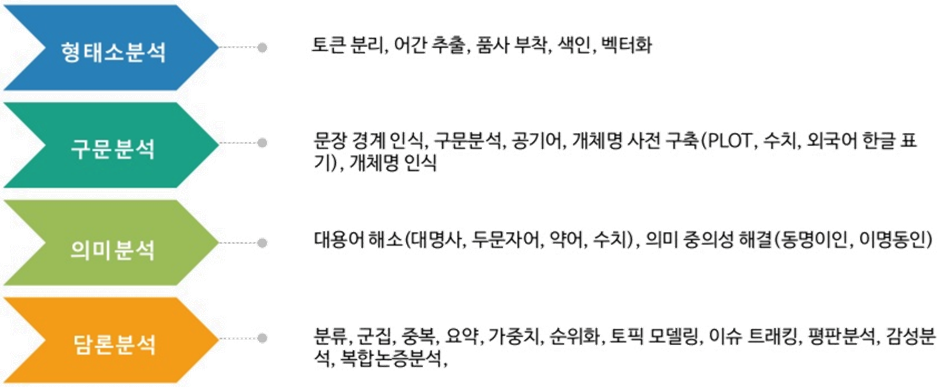
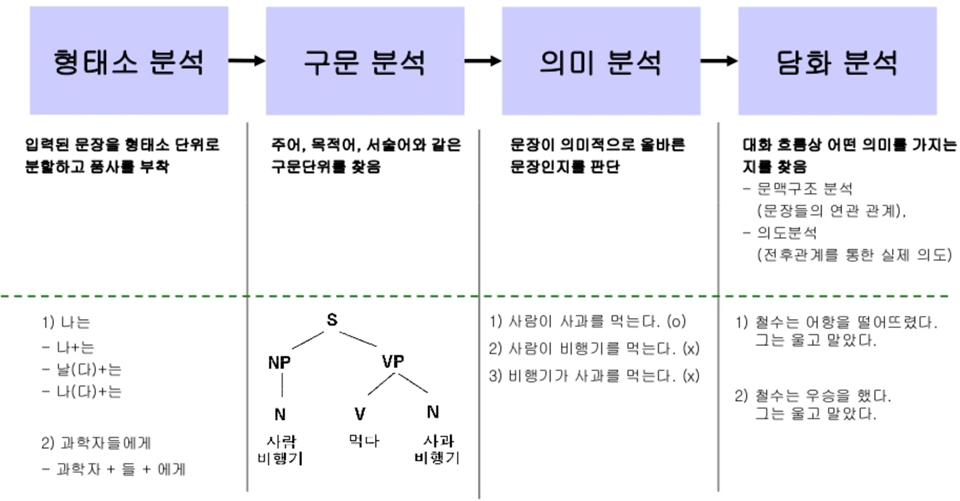

- 담화(이야기)
    - 문장이 연속되어 이루어지는 말의 단위, 문단
- 문장
    - 완결된 내용을 나타내는 최소 단위
    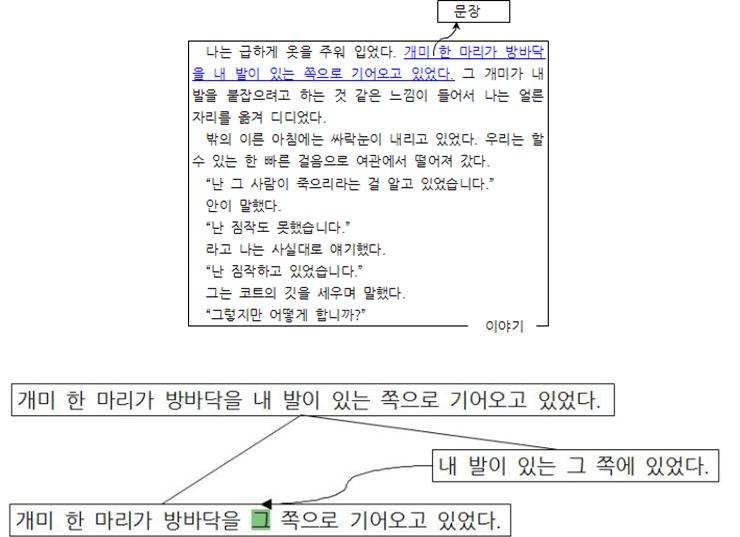
- 어절
    - 문장을 구성하는 단위
    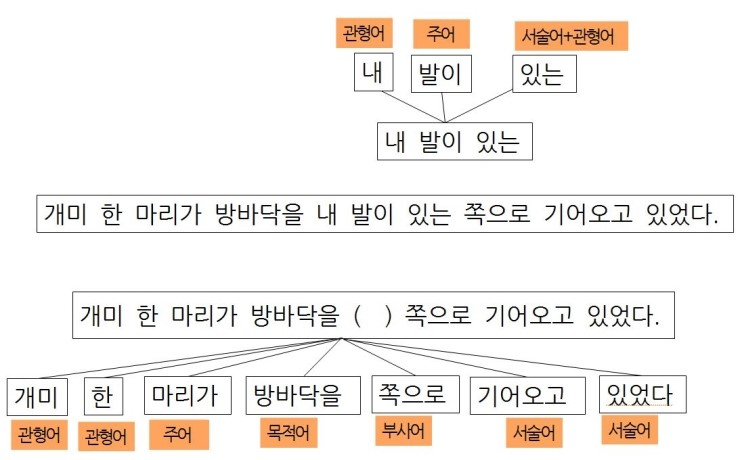
- 단어
    - 어절을 구성하는 요소
    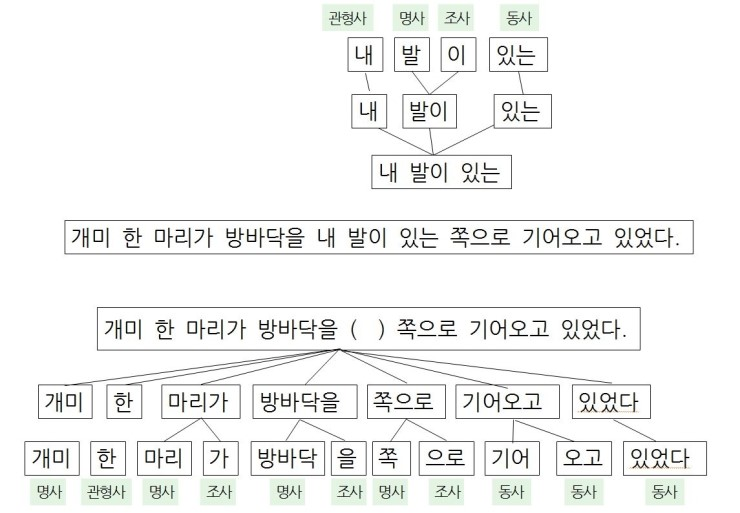
- 형태소
    - 의미를 가진 문법의 최소 단위
    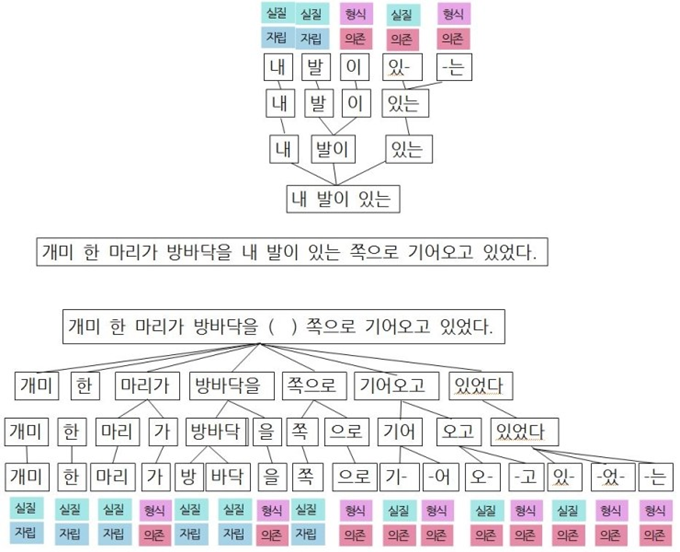

### KoNLPy
- 한국어 처리를 위한 파이썬 패키지

In [1]:
import konlpy

In [2]:
from konlpy.corpus import kolaw
corpus = kolaw.open('constitution.txt').read()

In [3]:
print(corpus.split("\n")[:3])

['대한민국헌법', '', '유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.']


### 형태소 분석기 종류
- 한나눔(Hannanum)
    - 카이스트 시맨틱 웹 연구 센터에서 개발(JAVA)
- 꼬마(Kkma)
    - 서울대학교 지능 데이터 시스템 연구실(IDS Lab)에서 JAVA로 개발
- 코모란(Komoran)
    - NLP 연구 동호회 Shineware에서 개발(JAVA)
- 메카브(Mecab)
    - 동경대의 일본어 형태소 분석기 Mecab를 한국어에 적용하여 개발
- 트위터
    - 트위터에서 개발한 오픈소스 한국어 처리기(Scala)
    
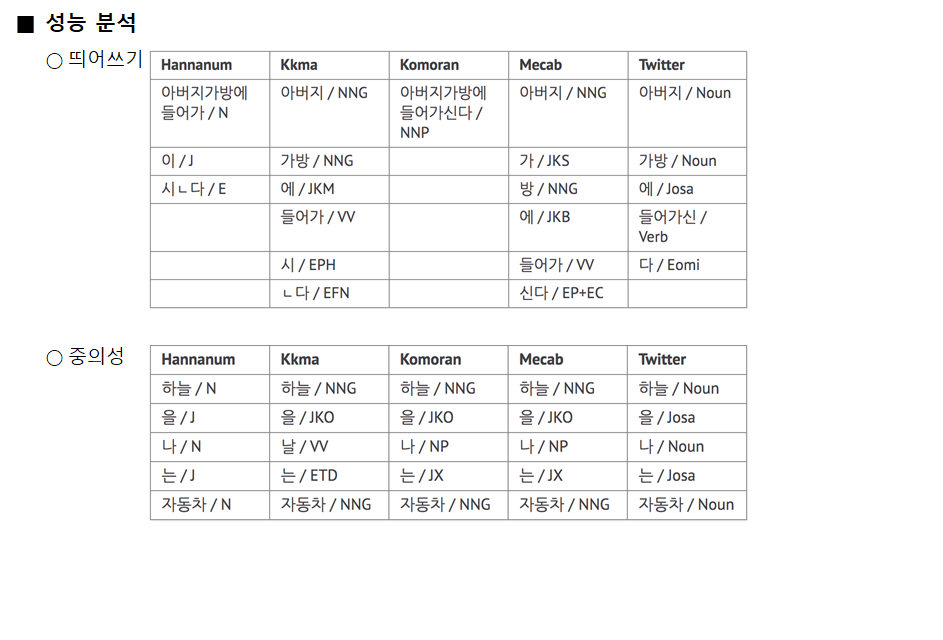

In [10]:
## Hannanum

from konlpy.tag import Hannanum

h = Hannanum()
text = corpus.split('\n')[2]
textSplit = text.split()
candidates = h.analyze(text)

for (i,t) in enumerate(textSplit):
    print(t)
    
    for c in candidates[i]:
        print(" ", c)
    print(" ")

print(h.pos(text), end='\n\n')
print(h.morphs(text), end='\n\n')
print(h.nouns(text))

유구한
  [('유구', 'ncps'), ('한', 'ncn')]
  [('유구', 'ncps'), ('하', 'xsms'), ('ㄴ', 'etm')]
 
역사와
  [('역사', 'ncn'), ('와', 'jcj')]
  [('역사', 'ncn'), ('와', 'jct')]
 
전통에
  [('전통', 'ncn'), ('에', 'jca')]
  [('전', 'xp'), ('통', 'ncn'), ('에', 'jca')]
  [('절', 'pvg'), ('ㄴ', 'etm'), ('통', 'nbn'), ('에', 'jca')]
 
빛나는
  [('빛나', 'pvg'), ('는', 'etm')]
  [('빛', 'ncn'), ('나', 'jxc'), ('는', 'jxc')]
  [('빛나', 'pvg'), ('아', 'ecs'), ('는', 'jxc')]
  [('빛나', 'pvg'), ('아', 'ef'), ('는', 'etm')]
 
우리
  [('우리', 'npp')]
 
대한국민은
  [('대한', 'ncn'), ('국민', 'ncn'), ('은', 'jxc')]
  [('대한', 'ncn'), ('국민', 'ncn'), ('은', 'ncn')]
 
3·1운동으로
  [('3·1운동', 'ncn'), ('으로', 'jca')]
  [('3·1운동으', 'ncn'), ('로', 'jca')]
  [('3·1운동으로', 'ncn')]
  [('3·1운동', 'nqq'), ('으로', 'jca')]
  [('3·1운동으', 'nqq'), ('로', 'jca')]
  [('3·1운동으로', 'nqq')]
 
건립된
  [('건립', 'ncpa'), ('되', 'xsvn'), ('ㄴ', 'etm')]
 
대한민국임시정부의
  [('대한민국임시정부', 'ncn'), ('의', 'jcm')]
  [('대한민국임시정부', 'ncn'), ('의', 'ncn')]
  [('대한', 'ncn'), ('민국', 'ncn'), ('임시정부', 'ncn'), ('의', 'jcm')]

[('유구', 'N'), ('하', 'X'), ('ㄴ', 'E'), ('역사', 'N'), ('와', 'J'), ('전통', 'N'), ('에', 'J'), ('빛', 'N'), ('나는', 'J'), ('우리', 'N'), ('대한국민', 'N'), ('은', 'J'), ('3·1운동', 'N'), ('으로', 'J'), ('건립', 'N'), ('되', 'X'), ('ㄴ', 'E'), ('대한민국임시정부', 'N'), ('의', 'J'), ('법통', 'N'), ('과', 'J'), ('불의', 'N'), ('에', 'J'), ('항거', 'N'), ('하', 'X'), ('ㄴ', 'E'), ('4·19민주이념', 'N'), ('을', 'J'), ('계승', 'N'), ('하고', 'J'), (',', 'S'), ('조국', 'N'), ('의', 'J'), ('민주개혁', 'N'), ('과', 'J'), ('평화적', 'N'), ('통일', 'N'), ('의', 'J'), ('사명', 'N'), ('에', 'J'), ('입각', 'N'), ('하', 'X'), ('어', 'E'), ('정의·인도', 'N'), ('와', 'J'), ('동포애', 'N'), ('로써', 'J'), ('민족', 'N'), ('의', 'J'), ('단결', 'N'), ('을', 'J'), ('공고히', 'M'), ('하', 'P'), ('고', 'E'), (',', 'S'), ('모든', 'M'), ('사회적', 'N'), ('폐습', 'N'), ('과', 'J'), ('불의', 'N'), ('를', 'J'), ('타파', 'N'), ('하', 'X'), ('며', 'E'), (',', 'S'), ('자율', 'N'), ('과', 'J'), ('조화', 'N'), ('를', 'J'), ('바탕', 'N'), ('으로', 'J'), ('자유민주적', 'N'), ('기본질서', 'N'), ('를', 'J'), ('더욱', 'M'), ('확고히', 'M'), ('하', 'P'), ('

In [8]:
corpus.split('\n')[2]

'유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.'

In [11]:
## Komoran
from konlpy.tag import Komoran
r = Komoran()

print(r.pos(text), end = '\n\n')
print(r.morphs(text), end = '\n\n')
print(r.nouns(text))

[('유구', 'XR'), ('하', 'XSA'), ('ㄴ', 'ETM'), ('역사', 'NNG'), ('와', 'JC'), ('전통', 'NNG'), ('에', 'JKB'), ('빛나', 'VV'), ('는', 'ETM'), ('우리', 'NP'), ('대하', 'VV'), ('ㄴ', 'ETM'), ('국민', 'NNP'), ('은', 'JX'), ('3', 'SN'), ('·', 'SP'), ('1', 'SN'), ('운동', 'NNP'), ('으로', 'JKB'), ('건립', 'NNG'), ('되', 'XSV'), ('ㄴ', 'ETM'), ('대한민국', 'NNP'), ('임시', 'NNG'), ('정부', 'NNG'), ('의', 'JKG'), ('법통', 'NNG'), ('과', 'JC'), ('불의', 'NNP'), ('에', 'JKB'), ('항거', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETM'), ('4', 'SN'), ('·', 'SP'), ('19', 'SN'), ('민주', 'NNP'), ('이념', 'NNG'), ('을', 'JKO'), ('계승', 'NNG'), ('하', 'XSV'), ('고', 'EC'), (',', 'SP'), ('조국', 'NNP'), ('의', 'JKG'), ('민주개혁', 'NNG'), ('과', 'JC'), ('평화', 'NNG'), ('적', 'XSN'), ('통일', 'NNG'), ('의', 'JKG'), ('사명', 'NNG'), ('에', 'JKB'), ('입각', 'NNG'), ('하', 'XSV'), ('아', 'EC'), ('정의', 'NNG'), ('·', 'SP'), ('인도', 'NNP'), ('와', 'JC'), ('동포애', 'NNG'), ('로써', 'JKB'), ('민족', 'NNG'), ('의', 'JKG'), ('단결', 'NNG'), ('을', 'JKO'), ('공고히', 'MAG'), ('하', 'VV'), ('고', 'EC'), (',', 'SP'), ('

In [12]:
## Twitter
from konlpy.tag import Twitter

t = Twitter()

print(t.phrases(text), end = '\n\n')
print(t.pos(text), end = '\n\n')
print(t.morphs(text), end = '\n\n')
print(t.nouns(text))

g:\python\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['유구', '역사', '역사와 전통', '우리', '우리 대한국민', '1운동', '건립', '건립된 대한민국임시정부', '건립된 대한민국임시정부의 법통과', '건립된 대한민국임시정부의 법통과 불의', '항거', '19민주이념', '계승', '조국', '조국의 민주개혁', '조국의 민주개혁과 평화적 통일', '조국의 민주개혁과 평화적 통일의 사명', '입각하', '정의', '인도', '인도와 동포애로써', '인도와 동포애로써 민족', '인도와 동포애로써 민족의 단결', '공고', '모든', '모든 사회적 폐습', '모든 사회적 폐습과 불의', '타파', '자율', '자율과 조화', '바탕', '자유민주적 기본질서', '더욱', '정치', '경제', '사회', '문화', '문화의 모든', '문화의 모든 영역', '각인', '각인의 기회', '능력', '최고도로', '최고도로 발휘', '자유', '자유와 권리', '책임', '책임과 의무', '완수', '국민생활', '국민생활의 균등한 향상', '기하', '세계평화', '세계평화와 인류공영', '이바지함', '우리들', '우리들과 우리들', '우리들과 우리들의 자손', '우리들과 우리들의 자손의 안전', '확보', '확보할 것', '다짐', '1948년', '1948년 7월', '1948년 7월 12일', '제정', '8차', '개정', '개정된 헌법', '이제', '이제 국회', '이제 국회의 의결', '국민투표', '전통', '대한국민', '운동', '대한민국', '임시정부', '통과', '불의', '19', '민주', '이념', '개혁', '통일', '사명', '각하', '동포', '로써', '민족', '단결', '폐습', '조화', '기본질서', '영역', '기회', '최고', '도로', '발휘', '권리', '의무', '국민', '생활', '향상', '세계', '평화', '인류', '공영', '이바지', '자손', '안전', '행복', '7월', '12일', '헌법', '국회', '의결']

[('유구'

1294 1294


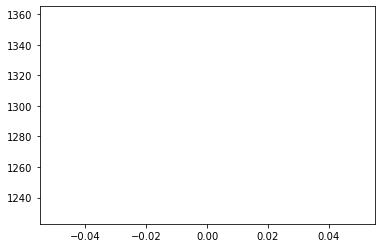

In [3]:
## corpus 탐색

from konlpy.corpus import kolaw
from konlpy.tag import Kkma as kkma
from matplotlib import pyplot as plt

k = kkma()
pos = lambda x: ['/'.join(p) for p in k.pos(x)]
docs = [kolaw.open(i).read() for i in kolaw.fileids()]

global_unique = []
global_unique_cnt = []
for doc in docs:
    tokens = pos(doc)
    unique = set(tokens)
    global_unique += list(unique)
    global_unique = list(set(global_unique))
    global_unique_cnt.append(len(global_unique))
    print(len(unique), len(global_unique))

#draw heap
plt.plot(global_unique_cnt)
plt.show()

In [4]:
global_unique_cnt

[1294]

## NLTK
- 영어 corpus 다운로드 기능
- 영어 corpus 단어로 tokenzing


In [6]:
import nltk

In [7]:
nltk.download('gutenberg')
nltk.download('maxent_treebank_pos_tagger')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\HYU\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\HYU\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\maxent_treebank_pos_tagger.zip.


True

In [8]:
from nltk.corpus import gutenberg

files = gutenberg.fileids()
print(files)

corpus = gutenberg.open('austen-emma.txt').read()
print(corpus)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']
[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses;

In [9]:
from nltk.tokenize import sent_tokenize
sent_tokenize(corpus)

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.",
 'Between _them_ it was more the intimacy\nof sisters.',
 "Even before Miss Taylor had ceased to hold the nominal

In [10]:
from nltk.tokenize import word_tokenize

for line in sent_tokenize(corpus):
    print(word_tokenize(line))

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.']
['She', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', ',', 'indulgent', 'father', ';', 'and', 'had', ',', 'in', 'consequence', 'of', 'her', 'sister', "'s", 'marriage', ',', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', '.']
['Her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of', 'her', 'caresses', ';', 'and', 'her', 'place', 'had', 'been', 'supplied', 'by', 'a

['My', 'only', 'scruple', 'in', 'advising', 'the', 'match', 'was', 'on', 'his', 'account', ',', 'as', 'being', 'beneath', 'his', 'deserts', ',', 'and', 'a', 'bad', 'connexion', 'for', 'him', '.']
['I', 'felt', 'that', ',', 'as', 'to', 'fortune', ',', 'in', 'all', 'probability', 'he', 'might', 'do', 'much', 'better', ';', 'and', 'that', 'as', 'to', 'a', 'rational', 'companion', 'or', 'useful', 'helpmate', ',', 'he', 'could', 'not', 'do', 'worse', '.']
['But', 'I', 'could', 'not', 'reason', 'so', 'to', 'a', 'man', 'in', 'love', ',', 'and', 'was', 'willing', 'to', 'trust', 'to', 'there', 'being', 'no', 'harm', 'in', 'her', ',', 'to', 'her', 'having', 'that', 'sort', 'of', 'disposition', ',', 'which', ',', 'in', 'good', 'hands', ',', 'like', 'his', ',', 'might', 'be', 'easily', 'led', 'aright', 'and', 'turn', 'out', 'very', 'well', '.']
['The', 'advantage', 'of', 'the', 'match', 'I', 'felt', 'to', 'be', 'all', 'on', 'her', 'side', ';', 'and', 'had', 'not', 'the', 'smallest', 'doubt', '(', 

['Emma', 'spoke', 'with', 'a', 'very', 'proper', 'degree', 'of', 'pleasure', ';', 'and', 'fully', 'assented', 'to', 'his', 'proposition', 'of', 'Mr.', 'Frank', 'Churchill', 'and', 'Miss', 'Smith', 'making', 'their', 'party', 'quite', 'complete', '.']
['``', 'He', 'has', 'been', 'wanting', 'to', 'come', 'to', 'us', ',', "''", 'continued', 'Mr.', 'Weston', ',', "''", 'ever', 'since', 'September', ':', 'every', 'letter', 'has', 'been', 'full', 'of', 'it', ';', 'but', 'he', 'can', 'not', 'command', 'his', 'own', 'time', '.']
['He', 'has', 'those', 'to', 'please', 'who', 'must', 'be', 'pleased', ',', 'and', 'who', '(', 'between', 'ourselves', ')', 'are', 'sometimes', 'to', 'be', 'pleased', 'only', 'by', 'a', 'good', 'many', 'sacrifices', '.']
['But', 'now', 'I', 'have', 'no', 'doubt', 'of', 'seeing', 'him', 'here', 'about', 'the', 'second', 'week', 'in', 'January', '.', "''"]
['``', 'What', 'a', 'very', 'great', 'pleasure', 'it', 'will', 'be', 'to', 'you', '!']
['and', 'Mrs.', 'Weston', 'is

['she', 'was', 'not', 'so', 'easily', 'to', 'be', 'talked', 'out', 'of', 'it', '.']
['The', 'charm', 'of', 'an', 'object', 'to', 'occupy', 'the', 'many', 'vacancies', 'of', 'Harriet', "'s", 'mind', 'was', 'not', 'to', 'be', 'talked', 'away', '.']
['He', 'might', 'be', 'superseded', 'by', 'another', ';', 'he', 'certainly', 'would', 'indeed', ';', 'nothing', 'could', 'be', 'clearer', ';', 'even', 'a', 'Robert', 'Martin', 'would', 'have', 'been', 'sufficient', ';', 'but', 'nothing', 'else', ',', 'she', 'feared', ',', 'would', 'cure', 'her', '.']
['Harriet', 'was', 'one', 'of', 'those', ',', 'who', ',', 'having', 'once', 'begun', ',', 'would', 'be', 'always', 'in', 'love', '.']
['And', 'now', ',', 'poor', 'girl', '!']
['she', 'was', 'considerably', 'worse', 'from', 'this', 'reappearance', 'of', 'Mr.', 'Elton', '.']
['She', 'was', 'always', 'having', 'a', 'glimpse', 'of', 'him', 'somewhere', 'or', 'other', '.']
['Emma', 'saw', 'him', 'only', 'once', ';', 'but', 'two', 'or', 'three', 'times'

['I', 'wanted', 'to', 'keep', 'it', 'from', 'Jane', "'s", 'knowledge', ';', 'but', ',', 'unluckily', ',', 'I', 'had', 'mentioned', 'it', 'before', 'I', 'was', 'aware', '.', "''"]
['Miss', 'Bates', 'had', 'just', 'done', 'as', 'Patty', 'opened', 'the', 'door', ';', 'and', 'her', 'visitors', 'walked', 'upstairs', 'without', 'having', 'any', 'regular', 'narration', 'to', 'attend', 'to', ',', 'pursued', 'only', 'by', 'the', 'sounds', 'of', 'her', 'desultory', 'good-will', '.']
['``', 'Pray', 'take', 'care', ',', 'Mrs.', 'Weston', ',', 'there', 'is', 'a', 'step', 'at', 'the', 'turning', '.']
['Pray', 'take', 'care', ',', 'Miss', 'Woodhouse', ',', 'ours', 'is', 'rather', 'a', 'dark', 'staircase', '--', 'rather', 'darker', 'and', 'narrower', 'than', 'one', 'could', 'wish', '.']
['Miss', 'Smith', ',', 'pray', 'take', 'care', '.']
['Miss', 'Woodhouse', ',', 'I', 'am', 'quite', 'concerned', ',', 'I', 'am', 'sure', 'you', 'hit', 'your', 'foot', '.']
['Miss', 'Smith', ',', 'the', 'step', 'at', 'th

['``', 'Jane', 'Fairfax', 'has', 'feeling', ',', "''", 'said', 'Mr.', 'Knightley', '--', "''", 'I', 'do', 'not', 'accuse', 'her', 'of', 'want', 'of', 'feeling', '.']
['Her', 'sensibilities', ',', 'I', 'suspect', ',', 'are', 'strong', '--', 'and', 'her', 'temper', 'excellent', 'in', 'its', 'power', 'of', 'forbearance', ',', 'patience', ',', 'self-controul', ';', 'but', 'it', 'wants', 'openness', '.']
['She', 'is', 'reserved', ',', 'more', 'reserved', ',', 'I', 'think', ',', 'than', 'she', 'used', 'to', 'be', '--', 'And', 'I', 'love', 'an', 'open', 'temper', '.']
['No', '--', 'till', 'Cole', 'alluded', 'to', 'my', 'supposed', 'attachment', ',', 'it', 'had', 'never', 'entered', 'my', 'head', '.']
['I', 'saw', 'Jane', 'Fairfax', 'and', 'conversed', 'with', 'her', ',', 'with', 'admiration', 'and', 'pleasure', 'always', '--', 'but', 'with', 'no', 'thought', 'beyond', '.', "''"]
['``', 'Well', ',', 'Mrs.', 'Weston', ',', "''", 'said', 'Emma', 'triumphantly', 'when', 'he', 'left', 'them', ',',

['``', 'It', 'is', 'odd', 'though', ',', "''", 'observed', 'his', 'father', ',', '``', 'that', 'you', 'should', 'have', 'had', 'such', 'a', 'regular', 'connected', 'dream', 'about', 'people', 'whom', 'it', 'was', 'not', 'very', 'likely', 'you', 'should', 'be', 'thinking', 'of', 'at', 'Enscombe', '.']
['Perry', "'s", 'setting', 'up', 'his', 'carriage', '!']
['and', 'his', 'wife', "'s", 'persuading', 'him', 'to', 'it', ',', 'out', 'of', 'care', 'for', 'his', 'health', '--', 'just', 'what', 'will', 'happen', ',', 'I', 'have', 'no', 'doubt', ',', 'some', 'time', 'or', 'other', ';', 'only', 'a', 'little', 'premature', '.']
['What', 'an', 'air', 'of', 'probability', 'sometimes', 'runs', 'through', 'a', 'dream', '!']
['And', 'at', 'others', ',', 'what', 'a', 'heap', 'of', 'absurdities', 'it', 'is', '!']
['Well', ',', 'Frank', ',', 'your', 'dream', 'certainly', 'shews', 'that', 'Highbury', 'is', 'in', 'your', 'thoughts', 'when', 'you', 'are', 'absent', '.']
['Emma', ',', 'you', 'are', 'a', 'gr

['Emma', 'felt', 'that', 'her', 'own', 'note', 'had', 'deserved', 'something', 'better', ';', 'but', 'it', 'was', 'impossible', 'to', 'quarrel', 'with', 'words', ',', 'whose', 'tremulous', 'inequality', 'shewed', 'indisposition', 'so', 'plainly', ',', 'and', 'she', 'thought', 'only', 'of', 'how', 'she', 'might', 'best', 'counteract', 'this', 'unwillingness', 'to', 'be', 'seen', 'or', 'assisted', '.']
['In', 'spite', 'of', 'the', 'answer', ',', 'therefore', ',', 'she', 'ordered', 'the', 'carriage', ',', 'and', 'drove', 'to', 'Mrs.', 'Bates', "'s", ',', 'in', 'the', 'hope', 'that', 'Jane', 'would', 'be', 'induced', 'to', 'join', 'her', '--', 'but', 'it', 'would', 'not', 'do', ';', '--', 'Miss', 'Bates', 'came', 'to', 'the', 'carriage', 'door', ',', 'all', 'gratitude', ',', 'and', 'agreeing', 'with', 'her', 'most', 'earnestly', 'in', 'thinking', 'an', 'airing', 'might', 'be', 'of', 'the', 'greatest', 'service', '--', 'and', 'every', 'thing', 'that', 'message', 'could', 'do', 'was', 'tried

['I', 'have', 'nothing', 'to', 'do', 'with', 'William', "'s", 'wants', ',', 'but', 'it', 'really', 'is', 'of', 'very', 'great', 'importance', 'that', '_I_', 'should', 'see', 'Knightley', 'to-day', ';', 'and', 'it', 'becomes', 'a', 'matter', ',', 'therefore', ',', 'of', 'very', 'serious', 'inconvenience', 'that', 'I', 'should', 'have', 'had', 'this', 'hot', 'walk', 'to', 'no', 'purpose', '.', "''"]
['Emma', 'felt', 'that', 'she', 'could', 'not', 'do', 'better', 'than', 'go', 'home', 'directly', '.']
['In', 'all', 'probability', 'she', 'was', 'at', 'this', 'very', 'time', 'waited', 'for', 'there', ';', 'and', 'Mr.', 'Knightley', 'might', 'be', 'preserved', 'from', 'sinking', 'deeper', 'in', 'aggression', 'towards', 'Mr.', 'Elton', ',', 'if', 'not', 'towards', 'William', 'Larkins', '.']
['She', 'was', 'pleased', ',', 'on', 'taking', 'leave', ',', 'to', 'find', 'Miss', 'Fairfax', 'determined', 'to', 'attend', 'her', 'out', 'of', 'the', 'room', ',', 'to', 'go', 'with', 'her', 'even', 'downs

In [11]:
### 어절 분리
pattern = corpus.split()
print(pattern)

['[Emma', 'by', 'Jane', 'Austen', '1816]', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse,', 'handsome,', 'clever,', 'and', 'rich,', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition,', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence;', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her.', 'She', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate,', 'indulgent', 'father;', 'and', 'had,', 'in', 'consequence', 'of', 'her', "sister's", 'marriage,', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period.', 'Her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of', 'her', 'caresses;', 'and', 'her', 'place', 'had', 'been', 'supplied', 'by', 'an', 'excellent', 'woman', 'as', 'governess,', 'who', 'had', 'falle

In [12]:
from nltk import regexp_tokenize
pattern = r"([a-zA-z0-9]+)+"
tokens = regexp_tokenize(corpus, pattern)

In [13]:
tokens

['[Emma',
 'by',
 'Jane',
 'Austen',
 '1816]',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 'handsome',
 'clever',
 'and',
 'rich',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty',
 'one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 'She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 'indulgent',
 'father',
 'and',
 'had',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 's',
 'marriage',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 'Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistinct',
 'remembrance',
 'of',
 'her',
 'caresses',
 'and',
 'her',
 'place',
 'ha